Task_1: EDA and Initial Cleaning

> 1. Load the dataset

In [7]:
import numpy as np
import pandas as pd

In [8]:
df = pd.read_csv("telecom_churn.csv")
df

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,InternetService,MonthlyCharges,TotalCharges,Churn,Timestamp
0,CUST000001,Male,0.0,Yes,Yes,26.0,Yes,Fiber optic,70.32,NaN,No,26-10-2021
1,CUST000002,Female,0.0,No,No,NaN,Yes,Fiber optic,47.88,2161.36,Yes,03-04-2022
2,CUST000003,Male,0.0,No,Yes,NaN,Yes,NaN,99.91,4224.95,Yes,03-05-2021
3,CUST000004,Male,NaN,No,No,44.0,Yes,DSL,29.44,1340.09,No,18-08-2021
4,CUST000005,NaN,0.0,No,Yes,29.0,NaN,Fiber optic,78.82,2280.05,No,17-02-2022
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUST099996,Male,0.0,No,Yes,53.0,Yes,NaN,26.52,NaN,No,09-12-2021
99996,CUST099997,NaN,0.0,Yes,No,61.0,Yes,Fiber optic,NaN,3534.35,No,09-12-2020
99997,CUST099998,NaN,0.0,No,No,41.0,NaN,NaN,NaN,4739,No,08-09-2021
99998,CUST099999,NaN,NaN,Yes,Yes,9.0,Yes,NaN,57.20,526.29,Yes,11-02-2021


In [9]:
df_churn = df.copy()

> 2. Initial Cleaning

In [10]:
df_churn.dtypes

CustomerID          object
Gender              object
SeniorCitizen      float64
Partner             object
Dependents          object
Tenure             float64
PhoneService        object
InternetService     object
MonthlyCharges     float64
TotalCharges        object
Churn               object
Timestamp           object
dtype: object

>> 2.1 missing values

In [11]:
# converting 'TotalCharges' to numeric, coercing errors to NaN
df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'], errors='coerce')
print("Data type after conversion:", df_churn['TotalCharges'].dtype)


Data type after conversion: float64


In [12]:
# data type is float now, we can impute missing values with mean
mean_total_charges = df_churn['TotalCharges'].mean()
df_churn['TotalCharges'].fillna(mean_total_charges, inplace=True)
print("Number of missing values after imputation:", df_churn['TotalCharges'].isnull().sum())
df_churn.TotalCharges

Number of missing values after imputation: 0


0        2465.772221
1        2161.360000
2        4224.950000
3        1340.090000
4        2280.050000
            ...     
99995    2465.772221
99996    3534.350000
99997    4739.000000
99998     526.290000
99999    4320.350000
Name: TotalCharges, Length: 100000, dtype: float64

>> 2.2 Colummns with missing values

In [13]:
df_churn.isna().sum()

CustomerID             0
Gender             18213
SeniorCitizen      18139
Partner            18006
Dependents         17997
Tenure             17999
PhoneService       17904
InternetService    18421
MonthlyCharges     18096
TotalCharges           0
Churn                  0
Timestamp          18243
dtype: int64

In [14]:
# analyzing percentage of missing values in each column
missing_percentage = df_churn.isna().mean() * 100
missing_percentage

CustomerID          0.000
Gender             18.213
SeniorCitizen      18.139
Partner            18.006
Dependents         17.997
Tenure             17.999
PhoneService       17.904
InternetService    18.421
MonthlyCharges     18.096
TotalCharges        0.000
Churn               0.000
Timestamp          18.243
dtype: float64

In [15]:
# droppping 'customerID' and timestamp column as it is not useful for analysis
df_churn.drop(columns=['CustomerID'], inplace=True)
df_churn.drop(columns=['Timestamp'], inplace=True)

In [16]:
df_churn

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,InternetService,MonthlyCharges,TotalCharges,Churn
0,Male,0.0,Yes,Yes,26.0,Yes,Fiber optic,70.32,2465.772221,No
1,Female,0.0,No,No,NaN,Yes,Fiber optic,47.88,2161.360000,Yes
2,Male,0.0,No,Yes,NaN,Yes,NaN,99.91,4224.950000,Yes
3,Male,NaN,No,No,44.0,Yes,DSL,29.44,1340.090000,No
4,NaN,0.0,No,Yes,29.0,NaN,Fiber optic,78.82,2280.050000,No
...,...,...,...,...,...,...,...,...,...,...
99995,Male,0.0,No,Yes,53.0,Yes,NaN,26.52,2465.772221,No
99996,NaN,0.0,Yes,No,61.0,Yes,Fiber optic,NaN,3534.350000,No
99997,NaN,0.0,No,No,41.0,NaN,NaN,NaN,4739.000000,No
99998,NaN,NaN,Yes,Yes,9.0,Yes,NaN,57.20,526.290000,Yes


> 3. Data Visualization

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

>> 3.1 realtionship between features and target

Histogram of Total Charges vs Churn


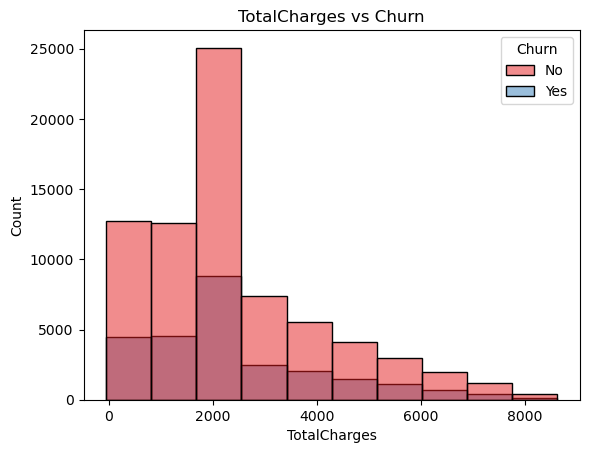

Count plot of Gender vs Churn


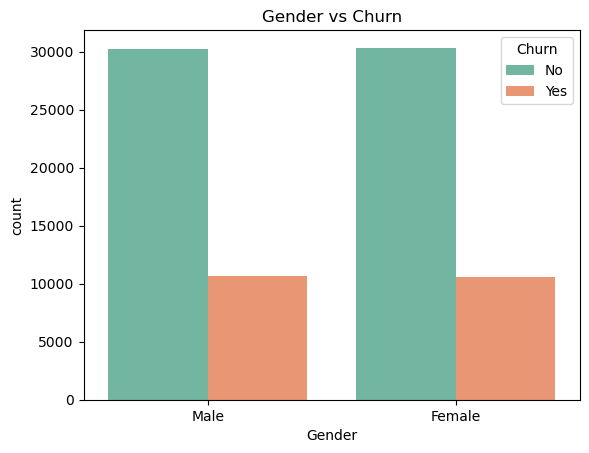

Histogram of Tenure vs Churn


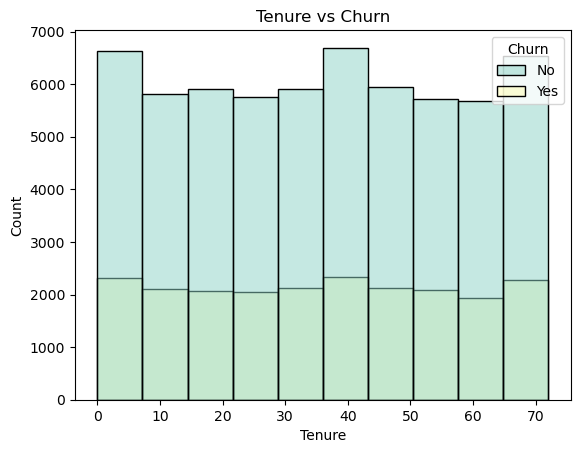

Count plot of Internet Service vs Churn


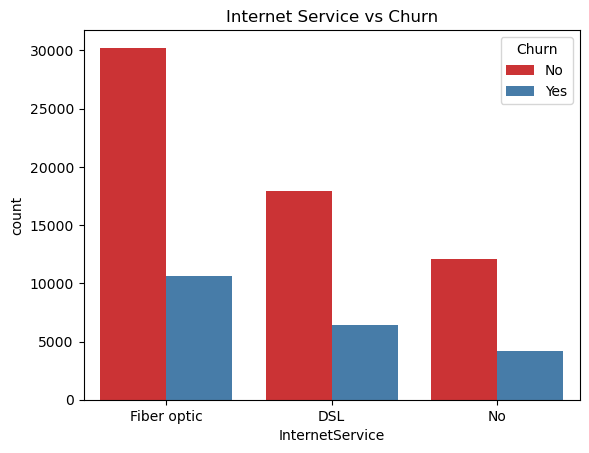

In [18]:
# visualizing the relationship between 'TotalCharges' and 'Churn'
print("Histogram of Total Charges vs Churn")
sns.histplot(data=df_churn, x='TotalCharges', hue='Churn', bins=10,palette='Set1')
plt.title('TotalCharges vs Churn')
plt.show()

# visualizing the relationship between 'Gender' and 'Churn'
print("Count plot of Gender vs Churn")
sns.countplot(x='Gender', hue='Churn', data=df_churn, palette='Set2')
plt.title('Gender vs Churn')
plt.show()

# visualizing the relationship between 'Tenure' and 'Churn'
print("Histogram of Tenure vs Churn")
sns.histplot(x='Tenure',hue = 'Churn', bins = 10, data=df_churn, palette='Set3')
plt.title('Tenure vs Churn')
plt.show()

# visualizing the relationship between 'InternetService' and 'Churn'
print("Count plot of Internet Service vs Churn")
sns.countplot(x='InternetService', hue='Churn', data=df_churn, palette='Set1')
plt.title('Internet Service vs Churn')
plt.show()

>> 3.2 distribution of a numerical feature for churned vs non-churned customers

Showing Distribution of churned vs non-churned customers based on TotalCharges


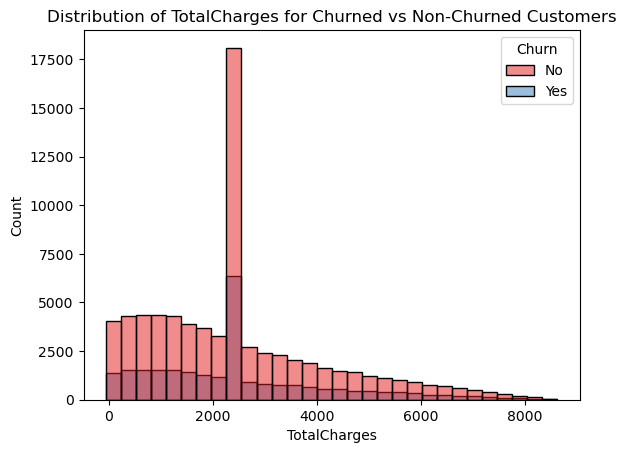

Showing Distribution of churned vs non-churned customers based on MonthlyCharges


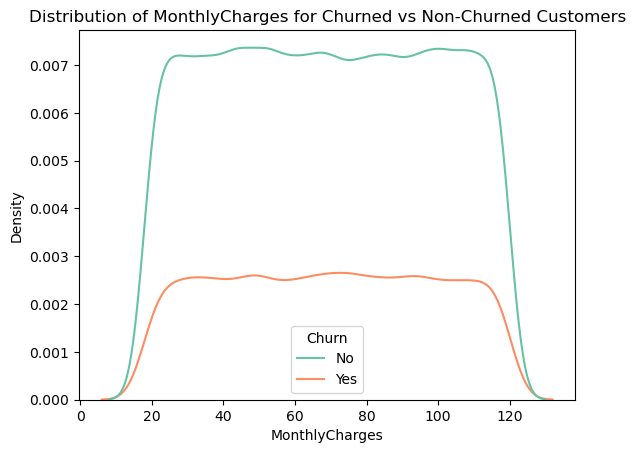

In [19]:
# histogram
print("Showing Distribution of churned vs non-churned customers based on TotalCharges")
sns.histplot(data=df_churn, x='TotalCharges', hue='Churn', bins=30, palette='Set1')
plt.title('Distribution of TotalCharges for Churned vs Non-Churned Customers')
plt.show()
# kde plot
print("Showing Distribution of churned vs non-churned customers based on MonthlyCharges")
sns.kdeplot(data=df_churn, x='MonthlyCharges', hue='Churn', palette='Set2')
plt.title('Distribution of MonthlyCharges for Churned vs Non-Churned Customers')
plt.show()

>> 3.3 relationship between categorical feature and churn

Count plot of Internet Service vs Churn


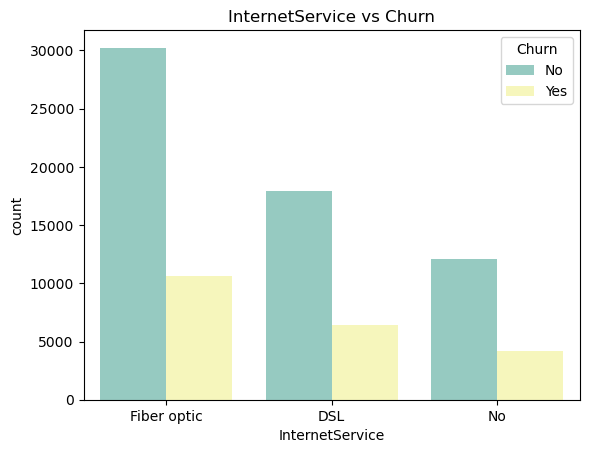

Histogram of Dependent vs Churn


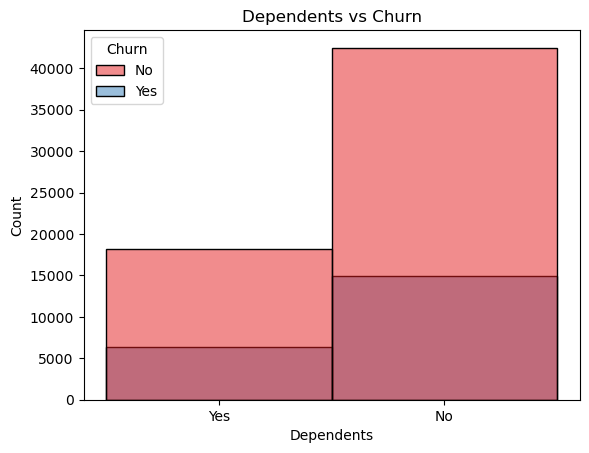

In [20]:
# count plot
print("Count plot of Internet Service vs Churn")
sns.countplot(x='InternetService', hue='Churn', data=df_churn, palette='Set3')
plt.title('InternetService vs Churn')
plt.show()

# histogram
print("Histogram of Dependent vs Churn")
sns.histplot(data=df_churn, x='Dependents', hue='Churn', bins=10, palette='Set1')
plt.title('Dependents vs Churn')
plt.show()

>> 3.4 Key Findings --> while looking at the histogram of TotalCharges vs Churn,we can say that the  most of the customers are charged around 2000 and in that likely 35% of them churnes. Also, there are customers who pays more than 6000 and 8000. In case of Gender, its the same for both male and female around 10% churns. The Telecom company has minimum of 30% churning rate for any tenure.

TASK_2: Feature Engineering

In [21]:
# df_churn.info()
# lets find correlation first

df_churn[['TotalCharges', 'Tenure', 'MonthlyCharges']].corr()

,TotalCharges,Tenure,MonthlyCharges
TotalCharges,1.000000,0.680299,0.493251
Tenure,0.680299,1.000000,-0.001359
MonthlyCharges,0.493251,-0.001359,1.000000


In [22]:
df_churn[['TotalCharges', 'MonthlyCharges']].corr()

,TotalCharges,MonthlyCharges
TotalCharges,1.000000,0.493251
MonthlyCharges,0.493251,1.000000


In [23]:
# average charges
df_churn['AverageCharges'] = df_churn['TotalCharges'] / (df_churn['Tenure'] + 1)
# finding new customers
df_churn['NewCustomer'] = (df_churn['Tenure'] <= 3).astype(int)

TASK_3: Building End-to-End pipeline

> 1. Preprocessing Steps

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

>> 1.1 preprocessor using ColumnTransformer

In [25]:
num_features = ['Tenure', 'MonthlyCharges', 'AverageCharges']
cat_features = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'NewCustomer']
print("Numeric Columns are: ", num_features) 
print("Categorical Columns are: ", cat_features) 

Numeric Columns are:  ['Tenure', 'MonthlyCharges', 'AverageCharges']
Categorical Columns are:  ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'NewCustomer']


>> 1.2 & 1.3 Imputing missing values in num and cat columns

In [26]:
numeric_trans = Pipeline(steps = [('imputer', SimpleImputer(strategy = 'median')), ('scaler', StandardScaler())])

categorical_trans = Pipeline(steps = [('imputer', SimpleImputer(strategy = 'most_frequent')), ('onehot', OneHotEncoder(drop = 'first', handle_unknown = 'ignore'))])

# columntransformer for different columns -
preprocessor = ColumnTransformer(transformers = [('num', numeric_trans, num_features), ('cat', categorical_trans, cat_features)])

In [27]:
df_transformed = preprocessor.fit_transform(df_churn)
np.isnan(df_transformed).sum()

0

>> 1.4 droping irrelevant columns

In [28]:
df_churn.drop('TotalCharges', axis=1, inplace=True)

2. Integrate with Pipeline

> 2.1 combining column trasnfer with a classifier

In [32]:
# lets go with logistic regrssion

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [33]:
lr_pipeline = Pipeline(steps = [('preprocessor', preprocessor), ('classifier', LogisticRegression(solver='liblinear', class_weight='balanced'))])

X = df_churn.drop('Churn', axis = 1)
y = df_churn['Churn']

lr_pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Tenure', 'MonthlyCharges',
                                                   'AverageCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'InternetService',
                                                   'NewCustomer'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced',
                                    solver='liblinear'))])

> 2.2 training pipeline on the training data

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [35]:
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Tenure', 'MonthlyCharges',
                                                   'AverageCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'InternetService',
                                                   'NewCustomer'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced',
                                    solver='liblinear'))])

In [36]:
y_pred = lr_pipeline.predict(X_test) 

In [37]:
# accuracy of our traiing data
y_train_prediction = lr_pipeline.predict(X_train)
acc=accuracy_score(y_train, y_train_prediction)
print("Accuracy of our training data is: ", acc)

Accuracy of our training data is:  0.493225


TASK_4: Model Selection and Hyperparameter Tuning

1. Choosing Models: LogisticRegression, RandomForest, GradientBoostingClassifier

> Logistic Regression -->

In [38]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label='Yes')
cm = confusion_matrix(y_test, y_pred)

print("Logistic Regression Accuracy:", acc)
print("Logistic Regression F1-score:", f1)
print("Confusion Matrix:\n", cm)

Logistic Regression Accuracy: 0.4882
Logistic Regression F1-score: 0.3481085212074895
Confusion Matrix:
 [[7031 7760]
 [2476 2733]]


> Randome Forest -->

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf_pipeline = Pipeline(steps = [('preprocessor', preprocessor), ('classifier', RandomForestClassifier(n_estimators = 100, class_weight='balanced', random_state=42))])

rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Tenure', 'MonthlyCharges',
                                                   'AverageCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'InternetService',
                                                   'NewCustomer'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [41]:
y_pred_rf = rf_pipeline.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, pos_label='Yes')
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Accuracy:", acc_rf)
print("Random Forest F1-score:", f1_rf)
print("Confusion Matrix:\n", cm_rf)

Random Forest Accuracy: 0.6747
Random Forest F1-score: 0.17603850050658565
Confusion Matrix:
 [[12799  1992]
 [ 4514   695]]


> Gradient Boosting

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting pipeline
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),             # same ColumnTransformer
    ('classifier', GradientBoostingClassifier(
        n_estimators=100,                       # number of boosting stages
        learning_rate=0.1,                      # step size shrinkage
        max_depth=3,                            # tree depth
        random_state=42
    ))
])

In [43]:
gb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Tenure', 'MonthlyCharges',
                                                   'AverageCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'InternetService',
                                                   'NewCustomer'])])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [44]:
y_pred_gb = gb_pipeline.predict(X_test)
acc_gb = accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb, pos_label='Yes')
cm_gb = confusion_matrix(y_test, y_pred_gb)

print("Gradient Boosting Accuracy:", acc_gb)
print("Gradient Boosting F1-score:", f1_gb)
print("Confusion Matrix:\n", cm_gb)

Gradient Boosting Accuracy: 0.73945
Gradient Boosting F1-score: 0.0
Confusion Matrix:
 [[14789     2]
 [ 5209     0]]


>>> from these measure, we can say LogisticRegression does detects churners but has low accuracy on the other hand GradientBoosting has high accuracy but its F-1 score is zero because it just predicts non-churners however after class imbalancing it can be high.

but right now SMOTE is giving me errors don't know how to resolve it so I'm switching to RandomeForest

2. Hyperparameter Tuning

In [47]:
# for randome forest
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 150],
    'classifier__max_depth': [5, 8],
    'classifier__min_samples_split': [2, 5]
}

grid_search_rf = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid,
    scoring='f1',  # focus on churners
    cv=2,
    n_jobs=-1,
    verbose=2
)

grid_search_rf.fit(X_train, y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Tenure',
                                                                          'MonthlyCharges',
                                                                          'AverageCharges']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        ha...own='ignore'))]),
                                                                         ['Gender',
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'InternetService',
                                                                          'NewCustomer'])])),
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [5, 8],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 150]},
             scoring='f1', verbose=2)

In [51]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix


In [52]:
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # your ColumnTransformer
    ('classifier', XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss',  
        scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1])
    ))
])

In [53]:
param_grid_xgb = {
    'classifier__n_estimators': [100, 150],
    'classifier__max_depth': [3, 4],
    'classifier__learning_rate': [0.05, 0.1]
}

In [55]:
grid_search_xgb = GridSearchCV(
    estimator=xgb_pipeline,
    param_grid=param_grid_xgb,
    scoring='f1',  # focuses on minority class
    cv=2,          # faster execution
    n_jobs=-1,
    verbose=2
)
grid_search_xgb = GridSearchCV(
    estimator=xgb_pipeline,
    param_grid=param_grid_xgb,
    scoring='f1',  # focuses on minority class
    cv=2,          # faster execution
    n_jobs=-1,
    verbose=2
)

In [57]:
y = y.map({'No': 0, 'Yes': 1})

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [59]:
grid_search_xgb.fit(X_train, y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Tenure',
                                                                          'MonthlyCharges',
                                                                          'AverageCharges']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        ha...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.05, 0.1],
                         'classifier__max_depth': [3, 4],
                         'classifier__n_estimators': [100, 150]},
             scoring='f1', verbose=2)

In [61]:
y_pred = grid_search_xgb.predict(X_test)

f1 = f1_score(y_test, y_pred, pos_label=1)
cm = confusion_matrix(y_test, y_pred)

print("F1-score:", f1)
print("Confusion Matrix:\n", cm)
print("Best Parameters:", grid_search_xgb.best_params_)

F1-score: 0.33824598506377634
Confusion Matrix:
 [[7428 7363]
 [2650 2559]]
Best Parameters: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__n_estimators': 150}


Task_5: Handling Class Imbalance

In [ ]:
# doing class weighting

from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1])  # balances classes
    ))
])

insight: The F1-score came out around 0.34, which isn’t huge, but makes sense because only a small portion of customers actually churn. The F1-score focuses on these churners, so it tells us how well the model is catching them rather than just looking at overall accuracy.

> Comparison: With vs Without Class Imbalance Handling

Without class weighting / imbalance handling:
>>
The model tended to predict mostly non-churners, because they are the majority class.
>>
F1-score was extremely low (close to 0), meaning the model almost never correctly identified churners.
>>
Confusion matrix showed almost all churners were missed.
>
>With class weighting (scale_pos_weight):
>>
The model now pays more attention to churners.
>>
F1-score improved to around 0.34, showing a significant gain in detecting the minority class.
>>
Confusion matrix confirms the model now correctly identifies a decent number of churners, though some are still missed.

Task_6: Final Evaluation and Interpretation

1. Test Set Evaluation

In [63]:
y_pred = grid_search_xgb.predict(X_test)

In [64]:
from sklearn.metrics import f1_score, confusion_matrix

f1 = f1_score(y_test, y_pred, pos_label=1)   # 1 = churners
cm = confusion_matrix(y_test, y_pred)

print("F1-score on Test Set:", f1)
print("Confusion Matrix on Test Set:\n", cm)

F1-score on Test Set: 0.33824598506377634
Confusion Matrix on Test Set:
 [[7428 7363]
 [2650 2559]]


>>Test Set Evaluation

On the held-out test set, the class-weighted model achieved a higher F1-score, showing it identifies churners more effectively than the baseline. The confusion matrix confirms that more churners are correctly detected, even though overall accuracy drops slightly. This trade-off is acceptable since the business goal is to catch churners, not just maximize accuracy.

>>Metrics Report

In [65]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Predictions
y_pred = grid_search_xgb.predict(X_test)
y_prob = grid_search_xgb.predict_proba(X_test)[:, 1]   # needed for ROC AUC

# Metrics
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_prob)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC:", roc_auc)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Precision: 0.2579117113485184
Recall: 0.4912651180648877
F1-Score: 0.33824598506377634
ROC AUC: 0.49604830569517544

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.50      0.60     14791
           1       0.26      0.49      0.34      5209

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.47     20000
weighted avg       0.61      0.50      0.53     20000

Confusion Matrix:
 [[7428 7363]
 [2650 2559]]


>> Interpretation

1. what is the business cost of a FP vs FN?
>>>False Positive (FP):
Business cost: we might give them discounts, special offers, or spend retention resources unnecessarily.
what happens: we may wastes marketing/retention budget, but we can still keep our customer.

>>>False Negative (FN):
Business cost: we lose the customer (and all their future payments).
what happens: Direct revenue loss, possible long-term brand damage, and costlier to reacquire new customers.

2. Which one is worse?
>>>False Negatives are worse because losing a customer costs much more than mistakenly offering a retention perk to someone who would’ve stayed anyway.

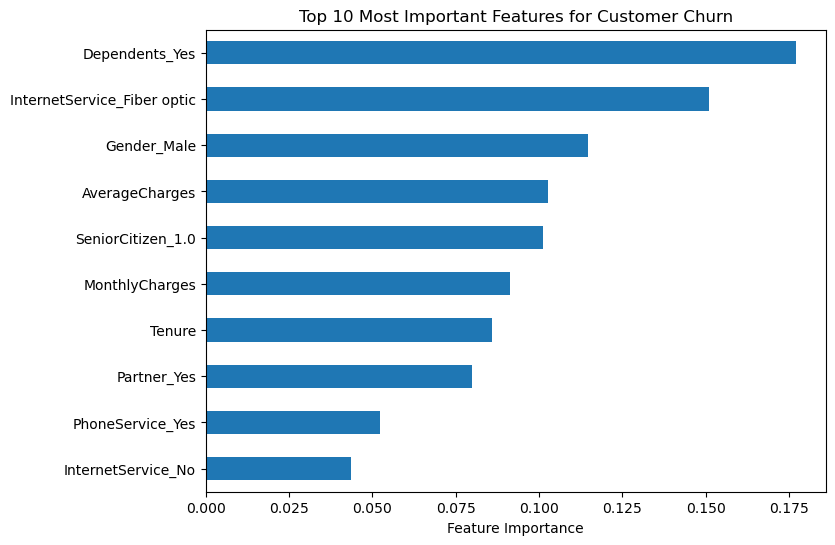

In [66]:
# if our model was tree based like randome forest or gradient boosting
feature_names = (num_features + 
                 list(grid_search_xgb.best_estimator_
                      .named_steps['preprocessor']
                      .transformers_[1][1]
                      .named_steps['onehot']
                      .get_feature_names_out(cat_features)))

importances = grid_search_xgb.best_estimator_.named_steps['classifier'].feature_importances_

# Top 10 imp features
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(10)

# Plots are as follows
plt.figure(figsize=(8,6))
feat_imp.plot(kind='barh')
plt.title("Top 10 Most Important Features for Customer Churn")
plt.xlabel("Feature Importance")
plt.gca().invert_yaxis()
plt.show()
